## Graphing Spectra

Make simple plots of spectra across all channels at a particular latitude, longtiude, and time.

<h3>Navigation information</h3>

<ol start='0'>
    <li> Number of Counts </li>
    <li>Phase</li>
    <li>Emission</li>
    <li>Incidence</li>
    <li>Local Emission</li>
    <li>Local Incidence</li>
    <li>Latitude</li>
    <li>Longitude</li>
    <li>Pixel Resolution</li>
    <li>Line Resolution</li>
    <li>Sample Resolution</li>
    <li>Detector Resoltion</li>
    <li>North Azimuth</li>
    <li>Sun Azimuth</li>
    <li>Spacecraft Azimuth</li>
    <li>Off Nadir Angle</li>
    <li>Subspacecraft Ground Azimuth</li>
    <li>Subsolar Ground Azimuth</li>
    <li>Morphology = Pixel Resolution/cos(Emission Angle)</li>
    <li>Albedo = PixelResolution * [(1 / cos(EmissionAngle)) + (1 / cos(IncidenceAngle))] </li>
    <li>Right Ascension </li>
    <li>Declination </li>
    <li>Body Fixed Coordinate X </li>
    <li> Body Fixed Coordinate Y</li>
    <li> Body Fixed Coordinate Z </li>
</ol>

In [3]:
import numpy as np
import matplotlib
import pysis
matplotlib.use('Qt4Agg')
from matplotlib import pyplot as plt
import scipy.optimize as sco
vims_wave = np.loadtxt('/home/alanyu/Dropbox (MIT)/VIMS_UROP/vims_wave.txt') 

/home/alanyu/anaconda3/lib/python3.8/site-packages/pysis/env.py:33: RuntimeWarning: Could not find isis. Is `ISISROOT` set?
  warnings.warn('Could not find isis. Is `ISISROOT` set?', RuntimeWarning)


In [4]:
data = pysis.CubeFile('/home/alanyu/Dropbox (MIT)/VIMS_UROP/data/2005359T100445_2005360T101919/CM_1514284191_1_ir.cub').data
lbl = pysis.CubeFile('/home/alanyu/Dropbox (MIT)/VIMS_UROP/data/2005359T100445_2005360T101919/CM_1514284191_1_ir.cub').label
nav = pysis.CubeFile('/home/alanyu/Dropbox (MIT)/VIMS_UROP/data/2005359T100445_2005360T101919/CM_1514284191_1_ir_nav.cub').data

In [15]:
def plot_spectra(cube_data, navigation, point):
    '''
    Point: tuple specifying (x,y) coordinate of interest.
    
    Plots spectra in the two micron window at Point.
    '''
    
    plt.plot(vims_wave[15:26],data[15:26,point[0],point[1]])
    
    plt.show()

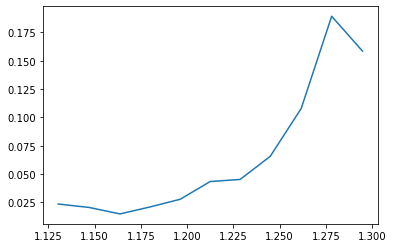

In [16]:
%matplotlib inline
plot_spectra(data,nav,(40,20))

In [5]:
def constant_value_nav(nav,lbl, nav_number,value):
    """
    Given navigation data, an index into nav measurements, and a value, returns a set of all (i,j) with that value in nav. 
    """
    l=lbl['IsisCube']['Instrument']['SwathLength']
    w=lbl['IsisCube']['Instrument']['SwathWidth']
    return [(i,j) for i in range(l) for j in range(w) if round(nav[nav_number,i,j])==value]


In [19]:
def gaussian(x,mean,sigma,A):
    
    return A*np.exp(-((x-mean)**2.)/(2.*sigma**2))

def powerlaw(x,a, k, c):
    
    return a*x**k + c

band_channels = [29,30,31,32,47,48,49,50,51,52,53,54,55,84,85,86,87,88,89,90] + [i for i in range(160,181)] 

In [23]:
def powerlaw_and_gaussian(data,point):
    '''
    Adjust data with powerlaw and fit gaussian.
    '''
    band_channels = [29,30,31,32,47,48,49,50,51,52,53,54,55,84,85,86,87,88,89,90] + [i for i in range(160,181)] 
    
    plaw,_ = sco.curve_fit(powerlaw, vims_wave[band_channels], data[band_channels, point[0],point[1]], p0 = (.05,-2,0), maxfev = 10000)
    adjusted_data = data[40:51, point[0],point[1]] - powerlaw(vims_wave[40:51],*plaw)
    
    plt.plot(vims_wave[40:51],adjusted_data)

    fit,cov = sco.curve_fit(gaussian,vims_wave[40:51],adjusted_data,p0=(1.6,.125,.001),maxfev=100000)
    plt.plot(vims_wave[40:51],gaussian(vims_wave[40:51],*fit))
    plt.show()

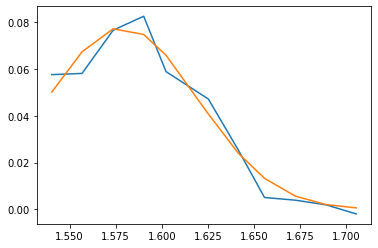

In [24]:
powerlaw_and_gaussian(data,(15,35))